In [1]:
import pandas as pd
from dataset import Dataset
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
ds = Dataset()
JSON_KEY_PATH = "./sprintda05-soomin.json"

In [ ]:
hackle_files = ds.hackle.file_list()
datapath = "gs://final-project-soomin/final_project/hackle"
for file in hackle_files:
    file_path = f"{datapath}/{file}.parquet"
    df = pd.read_parquet(file_path,
                         engine = "pyarrow",
                        storage_options= {"token": JSON_KEY_PATH})
    
    print(file)
    display(df.head(6))
    try:
        print(f'''
min : {df['event_datetime'].min()}
max : {df['event_datetime'].max()}
''')
    except:
        print("\n No 'event_datetime' column found. \n")
    print("\n" + "-" * 50 + "-" * 50 + "\n\n")
    df.info()
    print("\n" + "=" * 50 + "=" * 50 + "\n\n")

del datapath, df, file_path, hackle_files

device_properties


,id,device_id,device_model,device_vendor
0,1,000007C9-E103-4EB5-9777-A9084D4952DF,"iPhone14,7",Apple
1,2,00002245-458F-4CDD-8533-B448CD43DBD2,"iPhone14,7",Apple
2,3,00012620-313A-4502-9F8D-8DAB7443215B,"iPhone14,5",Apple
3,4,000137bc-80de-4bb5-b61d-df7f217a4501,SM-F711N,samsung
4,5,000227D6-B782-4367-91C4-486B76DF9E37,"iPhone12,3",Apple
5,6,00025EE1-BA46-4853-8FDD-B991FABA328F,"iPhone12,8",Apple



 No 'event_datetime' column found. 


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252380 entries, 0 to 252379
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             252380 non-null  int64 
 1   device_id      252380 non-null  object
 2   device_model   252380 non-null  object
 3   device_vendor  252380 non-null  object
dtypes: int64(1), object(3)
memory usage: 7.7+ MB



hackle_events


,event_id,event_datetime,event_key,session_id,id,item_name,page_name,friend_count,votes_count,heart_balance,question_id
0,00000533-3f1c-4b3b-81f1-0c8f35754b4e,2023-07-18 19:40:17,$session_start,4OzYh3seq3VKytpSn5pvQkZNQii1,00000533-3f1c-4b3b-81f1-0c8f35754b4e,,,NaN,NaN,NaN,NaN
1,00000716-27e9-4e72-a602-d0ce61784b06,2023-07-18 21:07:24,click_question_open,8QXy31PQxbW9qLzq0Y1dhR8Ypm52,00000716-27e9-4e72-a602-d0ce61784b06,,,64.0,436.0,4830.0,NaN
2,000007c8-68ce-40e6-9b1e-f0e34e8ff9cc,2023-08-06 20:18:03,click_bottom_navigation_profile,6bcea65d-9f40-46fc-888c-700fe707483f,000007c8-68ce-40e6-9b1e-f0e34e8ff9cc,,,26.0,174.0,4729.0,NaN
3,00000981-5e2a-4111-993e-4f1891ad9a53,2023-08-05 01:46:10,view_shop,XVYNT6zfhFWqIg9omwg2AHDjTLx2,00000981-5e2a-4111-993e-4f1891ad9a53,,,61.0,44.0,142.0,NaN
4,00000a7a-ba72-4332-b4a9-7910670aaeb2,2023-07-24 15:03:37,click_bottom_navigation_lab,XFB2SPiGfjbVhvJ3Q3DBsaT3m2B3,00000a7a-ba72-4332-b4a9-7910670aaeb2,,,119.0,545.0,3287.0,NaN
5,00000bfa-93ff-41d0-9b3a-c59ca76c0599,2023-07-29 18:39:10,$session_end,LztzUUFoRxdqTSPgQrX3MAAyNkM2,00000bfa-93ff-41d0-9b3a-c59ca76c0599,,,NaN,NaN,NaN,NaN



min : 2023-07-18 00:00:00
max : 2023-08-10 23:59:59


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11441319 entries, 0 to 11441318
Data columns (total 11 columns):
 #   Column          Dtype         
---  ------          -----         
 0   event_id        object        
 1   event_datetime  datetime64[ms]
 2   event_key       object        
 3   session_id      object        
 4   id              object        
 5   item_name       object        
 6   page_name       object        
 7   friend_count    float64       
 8   votes_count     float64       
 9   heart_balance   float64       
 10  question_id     float64       
dtypes: datetime64[ms](1), float64(4), object(6)
memory usage: 960.2+ MB



hackle_properties


,id,session_id,user_id,language,osname,osversion,versionname,device_id
0,1,4OzYh3seq3VKytpSn5pvQkZNQii1,,ko-KR,iOS,16.0,2.0.0,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74
1,2,8QXy31PQxbW9qLzq0Y1dhR8Ypm52,1046711,ko-KR,iOS,16.5.1,2.0.3,D5417226-F71B-4A9E-A180-CD072F2AB279
2,3,6bcea65d-9f40-46fc-888c-700fe707483f,1545130,ko,Android,13,2.0.5,6bcea65d-9f40-46fc-888c-700fe707483f
3,4,XVYNT6zfhFWqIg9omwg2AHDjTLx2,1224793,ko,Android,13,2.0.5,a05c1595-3e05-434b-8684-218b528bd725
4,5,XFB2SPiGfjbVhvJ3Q3DBsaT3m2B3,1329450,ko-US,iOS,16.5.1,2.0.5,EAC6C0B3-7CE8-40EA-8A91-9977C0BA5EF3
5,6,LztzUUFoRxdqTSPgQrX3MAAyNkM2,LztzUUFoRxdqTSPgQrX3MAAyNkM2,ko-KR,iOS,16.1,2.0.5,3F199073-9390-4137-B0B0-0DC4FC103009



 No 'event_datetime' column found. 


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525350 entries, 0 to 525349
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           525350 non-null  int64 
 1   session_id   525350 non-null  object
 2   user_id      525350 non-null  object
 3   language     525350 non-null  object
 4   osname       525350 non-null  object
 5   osversion    525350 non-null  object
 6   versionname  525350 non-null  object
 7   device_id    525350 non-null  object
dtypes: int64(1), object(7)
memory usage: 32.1+ MB



user_properties


,user_id,class,gender,grade,school_id
0,1000000,1,M,1,1885
1,1000009,10,F,2,3869
2,1000012,10,F,1,5091
3,1000013,8,F,2,1743
4,1000015,2,F,3,5078
5,1000018,2,F,3,2523



 No 'event_datetime' column found. 


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230819 entries, 0 to 230818
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    230819 non-null  object
 1   class      230819 non-null  int64 
 2   gender     230819 non-null  object
 3   grade      230819 non-null  int64 
 4   school_id  230819 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 8.8+ MB





In [ ]:
hackle_events_df = ds.hackle.hackle_events()
hackle_events_df['event_id'].equals(hackle_events_df['id'])

True

In [ ]:
random_session_id = hackle_events_df['session_id'].sample(n=1).values[0]
temp = hackle_events_df.loc[hackle_events_df['session_id'] == random_session_id].sort_values('event_datetime', ascending=True)
display(temp.head(5), temp.tail(5))

In [11]:
votes_files = ds.votes.file_list()
datapath = "gs://final-project-soomin/final_project/votes"
for file in votes_files:
    file_path = f"{datapath}/{file}.parquet"
    df = pd.read_parquet(file_path,
                        engine = "pyarrow",
                        storage_options= {"token": JSON_KEY_PATH})
    print(file)
    display(df.head(6))
    try:
        print(f'''
min : {df['created_at'].min()}
max : {df['created_at'].max()}
''')
    except:
        print("\n No 'created_at' column in this DataFrame. \n")
    print("\n" + "-" * 50 + "-" * 50 + "\n\n")

    df.info()
    print("\n" + "=" * 50 + "=" * 50 + "\n\n")
    
del datapath, df, file_path, votes_files

accounts_attendance


,id,attendance_date_list,user_id
0,1,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1446852
1,2,"[""2023-05-27"", ""2023-05-29"", ""2023-05-30"", ""20...",1359398
2,3,"[""2023-05-27"", ""2023-05-29"", ""2023-05-30"", ""20...",1501542
3,4,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1507767
4,5,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1287453
5,6,"[""2023-05-29"", ""2023-05-30"", ""2023-06-01"", ""20...",1394716



 No 'created_at' column in this DataFrame. 


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349637 entries, 0 to 349636
Data columns (total 3 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    349637 non-null  int64 
 1   attendance_date_list  349637 non-null  object
 2   user_id               349637 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 8.0+ MB



accounts_blockrecord


,id,reason,created_at,block_user_id,user_id
0,1,그냥...,2023-05-04 23:01:53,867483,878476
1,2,친구 사이가 어색해짐,2023-05-05 01:17:08,867190,867564
2,3,나랑 관련 없는 질문을 자꾸 보냄,2023-05-05 01:50:55,875110,875261
3,6,그냥...,2023-05-05 05:21:52,883696,883511
4,7,그냥...,2023-05-05 06:40:34,871349,870177
5,8,기타,2023-05-05 10:23:15,846967,880109



min : 2023-05-04 23:01:53
max : 2024-05-06 13:03:37


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19482 entries, 0 to 19481
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             19482 non-null  int64         
 1   reason         19482 non-null  object        
 2   created_at     19482 non-null  datetime64[ns]
 3   block_user_id  19482 non-null  int64         
 4   user_id        19482 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 761.1+ KB



accounts_failpaymenthistory


,id,productId,phone_type,created_at,user_id
0,6,heart.200,A,2023-05-14 05:49:22,1055891
1,7,heart.777,A,2023-05-14 08:17:21,1152151
2,8,heart.777,A,2023-05-14 10:11:46,986200
3,9,heart.1000,A,2023-05-14 11:53:09,1028261
4,10,heart.777,A,2023-05-14 12:30:47,1235730
5,11,heart.777,A,2023-05-14 14:17:32,1039257



min : 2023-05-14 05:49:22
max : 2023-09-17 09:12:53


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          163 non-null    int64         
 1   productId   56 non-null     object        
 2   phone_type  163 non-null    object        
 3   created_at  163 non-null    datetime64[ns]
 4   user_id     163 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 6.5+ KB



accounts_friendrequest


,id,status,created_at,updated_at,receive_user_id,send_user_id
0,7,P,2023-04-17 18:29:11,2023-04-17 18:29:11,831962,837521
1,10,A,2023-04-17 18:29:11,2023-04-22 06:02:53,832151,837521
2,11,A,2023-04-17 18:29:11,2023-04-18 19:28:41,832340,837521
3,13,A,2023-04-17 18:29:11,2023-04-19 11:05:04,833041,837521
4,20,P,2023-04-17 18:29:11,2023-04-17 18:29:11,834415,837521
5,21,P,2023-04-17 18:29:11,2023-04-17 18:29:11,834486,837521



min : 2023-04-17 18:29:11
max : 2024-05-09 09:21:47


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17147175 entries, 0 to 17147174
Data columns (total 6 columns):
 #   Column           Dtype         
---  ------           -----         
 0   id               int64         
 1   status           object        
 2   created_at       datetime64[ns]
 3   updated_at       datetime64[ns]
 4   receive_user_id  int64         
 5   send_user_id     int64         
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 784.9+ MB



accounts_group


,id,grade,class_num,school_id
0,1,1,1,1
1,8,3,2,1
2,9,3,3,1
3,10,2,2,1
4,11,2,3,1
5,12,2,1,1



 No 'created_at' column in this DataFrame. 


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84515 entries, 0 to 84514
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         84515 non-null  int64
 1   grade      84515 non-null  int64
 2   class_num  84515 non-null  int64
 3   school_id  84515 non-null  int64
dtypes: int64(4)
memory usage: 2.6 MB



accounts_nearbyschool


,id,distance,nearby_school_id,school_id
0,119021,0.004564,6,7
1,119022,0.010787,13,7
2,119023,0.012928,20,7
3,119024,0.013590,4,7
4,119025,0.014122,24,7
5,119026,0.014774,25,7



 No 'created_at' column in this DataFrame. 


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59500 entries, 0 to 59499
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                59500 non-null  int64  
 1   distance          59500 non-null  float64
 2   nearby_school_id  59500 non-null  int64  
 3   school_id         59500 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 1.8 MB



accounts_paymenthistory


,id,productId,phone_type,created_at,user_id
0,6,heart.777,A,2023-05-13 21:28:34,1211127
1,7,heart.777,A,2023-05-13 21:29:39,1151343
2,8,heart.777,A,2023-05-13 21:31:33,1002147
3,9,heart.777,A,2023-05-13 21:31:39,1095040
4,11,heart.777,A,2023-05-13 21:34:32,1164081
5,12,heart.200,A,2023-05-13 21:39:06,1239225



min : 2023-05-13 21:28:34
max : 2024-05-08 14:12:45


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95140 entries, 0 to 95139
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          95140 non-null  int64         
 1   productId   95140 non-null  object        
 2   phone_type  95140 non-null  object        
 3   created_at  95140 non-null  datetime64[ns]
 4   user_id     95140 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.6+ MB



accounts_pointhistory


,id,delta_point,created_at,user_id,user_question_record_id
0,790629,9,2023-04-28 12:27:49,849436,771777.0
1,790652,9,2023-04-28 12:28:02,849436,771800.0
2,790664,5,2023-04-28 12:28:09,849436,771812.0
3,790680,13,2023-04-28 12:28:16,849436,771828.0
4,790703,5,2023-04-28 12:28:26,849436,771851.0
5,790716,10,2023-04-28 12:28:32,849436,771864.0



min : 2023-04-28 12:27:49
max : 2024-05-08 01:36:18


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2338918 entries, 0 to 2338917
Data columns (total 5 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   id                       int64         
 1   delta_point              int64         
 2   created_at               datetime64[ns]
 3   user_id                  int64         
 4   user_question_record_id  float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 89.2 MB



accounts_school


,id,address,student_count,school_type
0,4,충청북도 충주시,239,H
1,5,충청북도 충주시,160,M
2,6,충청북도 충주시,200,H
3,7,충청북도 충주시,114,H
4,8,충청북도 충주시,139,M
5,9,충청북도 충주시,3,H



 No 'created_at' column in this DataFrame. 


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5951 entries, 0 to 5950
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             5951 non-null   int64 
 1   address        5951 non-null   object
 2   student_count  5951 non-null   int64 
 3   school_type    5951 non-null   object
dtypes: int64(2), object(2)
memory usage: 186.1+ KB



accounts_timelinereport


,id,reason,created_at,reported_user_id,user_id,user_question_record_id
0,28,타인을 사칭함,2023-05-06 04:44:57,874587,885082,3920588
1,37,친구를 비하하거나 조롱하는 어투,2023-05-06 05:41:19,881048,881298,4018679
2,46,친구를 비하하거나 조롱하는 어투,2023-05-06 06:26:59,887882,881945,4120914
3,64,허위 사실 언급,2023-05-06 07:07:46,888610,893684,4143049
4,65,허위 사실 언급,2023-05-06 07:07:52,888610,893684,4143049
5,73,허위 사실 언급,2023-05-06 07:24:39,884536,895569,4198891



min : 2023-05-06 04:44:57
max : 2023-06-02 08:30:06


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       208 non-null    int64         
 1   reason                   208 non-null    object        
 2   created_at               208 non-null    datetime64[ns]
 3   reported_user_id         208 non-null    int64         
 4   user_id                  208 non-null    int64         
 5   user_question_record_id  208 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 9.9+ KB



accounts_user


,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
0,831956,1,1,None,600,"[1292473, 913158, 1488461, 1064695, 1043565, 1...",0,2023-03-29 03:44:14.047130,[],[],N,0,0,0,0,NaN
1,831962,0,0,F,2248,"[833025, 832642, 982531, 879496, 838541, 83752...",1,2023-03-29 05:18:56.162368,[],[],N,253,40878,5499,110,12.0
2,832151,0,0,M,1519,"[838785, 982531, 882567, 879496, 838541, 83649...",0,2023-03-29 12:56:34.989468,[],[],N,0,37,0,47,1.0
3,832340,0,0,F,57,"[841345, 982531, 838785, 963714, 882567, 83252...",1,2023-03-29 12:56:35.020790,[],[],N,0,19,0,21,1.0
4,832520,0,0,M,1039,"[874050, 849763, 874212, 844297, 838541, 84004...",0,2023-03-29 12:56:35.049311,[],[],N,0,29,0,15,12.0
5,832614,0,0,M,1048,"[838541, 833041, 832151, 837806, 1437874, 1142...",1,2023-03-29 12:56:35.064406,[],[],N,0,28,0,14,12.0



min : 2023-03-29 03:44:14.047130
max : 2024-05-09 08:31:17.710824


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677085 entries, 0 to 677084
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  677085 non-null  int64         
 1   is_superuser        677085 non-null  int64         
 2   is_staff            677085 non-null  int64         
 3   gender              677083 non-null  object        
 4   point               677085 non-null  int64         
 5   friend_id_list      677085 non-null  object        
 6   is_push_on          677085 non-null  int64         
 7   created_at          677085 non-null  datetime64[ns]
 8   block_user_id_list  677085 non-null  object        
 9   hide_user_id_list   677085 non-null  object        
 10  ban_status          677085 n

,id,contacts_count,invite_user_id_list,user_id
0,259,30,[],1167696
1,1756,79,[],863169
2,13742,21,[854615],857205
3,13754,29,[],851431
4,13756,28,[849318],855476
5,13784,31,[855829],1482744



 No 'created_at' column in this DataFrame. 


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5063 entries, 0 to 5062
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   5063 non-null   int64 
 1   contacts_count       5063 non-null   int64 
 2   invite_user_id_list  5063 non-null   object
 3   user_id              5063 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 158.3+ KB



accounts_userquestionrecord


,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times
0,771777,C,2023-04-28 12:27:49,849469,252,849436,998458,0,N,2023-04-28 12:27:49,0,0
1,771800,C,2023-04-28 12:28:02,849446,244,849436,998459,0,N,2023-04-28 12:28:02,0,0
2,771812,C,2023-04-28 12:28:09,849454,183,849436,998460,1,N,2023-04-28 12:28:09,0,0
3,771828,C,2023-04-28 12:28:16,847375,101,849436,998461,0,N,2023-04-28 12:28:16,0,0
4,771851,C,2023-04-28 12:28:26,849477,209,849436,998462,1,N,2023-04-28 12:28:26,0,0
5,771864,C,2023-04-28 12:28:32,849670,239,849436,998463,0,N,2023-04-28 12:28:32,0,0



min : 2023-04-28 12:27:49
max : 2024-05-08 01:36:18


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217558 entries, 0 to 1217557
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   id                 1217558 non-null  int64         
 1   status             1217558 non-null  object        
 2   created_at         1217558 non-null  datetime64[ns]
 3   chosen_user_id     1217558 non-null  int64         
 4   question_id        1217558 non-null  int64         
 5   user_id            1217558 non-null  int64         
 6   question_piece_id  1217558 non-null  int64         
 7   has_read           1217558 non-null  int64         
 8   answer_status      1217558 non-null  object        
 9   answer_updated_at  1217558 non-null  datetime64[ns]
 10  report_count       1217558 non-null  int

,id,reason,created_at
0,42,재밌는 질문이 없어서,2023-03-29 13:22:12
1,43,함께 할 친구가 없어서,2023-03-29 13:24:59
2,44,함께 할 친구가 없어서,2023-03-29 13:53:32
3,45,함께 할 친구가 없어서,2023-03-29 13:54:03
4,46,재밌는 질문이 없어서,2023-03-30 00:31:19
5,47,기타 이유,2023-03-30 00:34:23



min : 2023-03-29 13:22:12
max : 2024-05-09 08:49:06


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70764 entries, 0 to 70763
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          70764 non-null  int64         
 1   reason      70764 non-null  object        
 2   created_at  70764 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ MB



event_receipts


,id,created_at,event_id,user_id,plus_point
0,2,2023-06-22 09:25:16,1,1193618,500
1,3,2023-06-22 09:38:53,1,928351,500
2,4,2023-06-22 10:32:15,1,904872,500
3,5,2023-06-22 13:03:06,1,974697,500
4,6,2023-06-22 13:40:38,1,1168260,500
5,8,2023-06-22 14:38:39,1,1190259,500



min : 2023-06-22 09:25:16
max : 2023-11-21 12:03:02


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          309 non-null    int64         
 1   created_at  309 non-null    datetime64[ns]
 2   event_id    309 non-null    int64         
 3   user_id     309 non-null    int64         
 4   plus_point  309 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 12.2 KB



events


,id,title,plus_point,event_type,is_expired,created_at
0,1,코드잇 은행 가입 이벤트,500,FCFS,1,2023-06-20 11:56:38
1,2,코드잇 멤버십 가입 이벤트,1000,FCFS,1,2023-08-08 07:43:45
2,3,예고 영상 기대평 이벤트,500,FCFS,1,2023-09-24 17:05:59



min : 2023-06-20 11:56:38
max : 2023-09-24 17:05:59


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          3 non-null      int64         
 1   title       3 non-null      object        
 2   plus_point  3 non-null      int64         
 3   event_type  3 non-null      object        
 4   is_expired  3 non-null      int64         
 5   created_at  3 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 276.0+ bytes



polls_question


,id,question_text,created_at
0,99,가장 신비한 매력이 있는 사람은?,2023-03-31 15:22:53
1,100,"""이 사람으로 한 번 살아보고 싶다"" 하는 사람은?",2023-03-31 15:22:53
2,101,미래의 틱톡커는?,2023-03-31 15:22:54
3,102,여기서 제일 특이한 친구는?,2023-03-31 15:22:54
4,103,가장 지켜주고 싶은 사람은?,2023-03-31 15:22:55
5,104,내 어깨를 내어줄 수 있는 사람은?,2023-03-31 15:22:56



min : 2023-03-31 15:22:53
max : 2023-06-06 06:15:52


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5025 entries, 0 to 5024
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             5025 non-null   int64         
 1   question_text  5025 non-null   object        
 2   created_at     5025 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 117.9+ KB



polls_questionpiece


,id,is_voted,created_at,question_id,is_skipped
0,998458,1,2023-04-28 12:27:22,252,0
1,998459,1,2023-04-28 12:27:22,244,0
2,998460,1,2023-04-28 12:27:22,183,0
3,998461,1,2023-04-28 12:27:22,101,0
4,998462,1,2023-04-28 12:27:22,209,0
5,998463,1,2023-04-28 12:27:22,239,0



min : 2023-04-28 12:27:22
max : 2024-05-07 11:32:30


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265476 entries, 0 to 1265475
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   id           1265476 non-null  int64         
 1   is_voted     1265476 non-null  int64         
 2   created_at   1265476 non-null  datetime64[ns]
 3   question_id  1265476 non-null  int64         
 4   is_skipped   1265476 non-null  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 48.3 MB



polls_questionreport


,id,reason,created_at,question_id,user_id
0,1,이 질문은 재미없어요,2023-04-19 06:20:35,250,837556
1,2,이 질문은 재미없어요,2023-04-19 06:58:09,113,837672
2,3,불쾌한 내용이 포함되어 있음,2023-04-19 06:58:17,113,837672
3,4,어떻게 이런 생각을? 이 질문 최고!,2023-04-19 08:12:42,119,837922
4,5,어떻게 이런 생각을? 이 질문 최고!,2023-04-19 08:12:50,119,837922
5,6,어떻게 이런 생각을? 이 질문 최고!,2023-04-19 08:12:54,119,837922



min : 2023-04-19 06:20:35
max : 2024-05-05 14:56:25


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51424 entries, 0 to 51423
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           51424 non-null  int64         
 1   reason       51424 non-null  object        
 2   created_at   51424 non-null  datetime64[ns]
 3   question_id  51424 non-null  int64         
 4   user_id      51424 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 2.0+ MB



polls_questionset


,id,question_piece_id_list,opening_time,status,created_at,user_id
0,99817,"[998458, 998459, 998460, 998461, 998462, 99846...",2023-04-28 12:27:22,F,2023-04-28 12:27:23,849436
1,99830,"[998588, 998589, 998590, 998591, 998592, 99859...",2023-04-28 12:28:07,F,2023-04-28 12:28:07,849438
2,99840,"[998689, 998691, 998693, 998695, 998697, 99869...",2023-04-28 12:28:38,F,2023-04-28 12:28:38,847375
3,99841,"[998688, 998690, 998692, 998694, 998696, 99869...",2023-04-28 12:28:38,F,2023-04-28 12:28:38,849446
4,99848,"[998768, 998769, 998770, 998771, 998772, 99877...",2023-04-28 12:28:57,F,2023-04-28 12:28:57,849477
5,99852,"[998808, 998809, 998810, 998811, 998813, 99881...",2023-04-28 12:29:04,F,2023-04-28 12:29:04,849469



min : 2023-04-28 12:27:23
max : 2024-05-07 11:32:30


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158384 entries, 0 to 158383
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      158384 non-null  int64         
 1   question_piece_id_list  158384 non-null  object        
 2   opening_time            158384 non-null  datetime64[ns]
 3   status                  158384 non-null  object        
 4   created_at              158384 non-null  datetime64[ns]
 5   user_id                 158384 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 7.3+ MB



polls_usercandidate


,id,created_at,question_piece_id,user_id
0,3088872,2023-04-28 12:27:49,998458,849444
1,3088873,2023-04-28 12:27:49,998458,849454
2,3088874,2023-04-28 12:27:49,998458,849460
3,3088875,2023-04-28 12:27:49,998458,849469
4,3088964,2023-04-28 12:28:02,998459,849446
5,3088965,2023-04-28 12:28:02,998459,849466



min : 2023-04-28 12:27:49
max : 2024-05-08 01:36:18


----------------------------------------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4769609 entries, 0 to 4769608
Data columns (total 4 columns):
 #   Column             Dtype         
---  ------             -----         
 0   id                 int64         
 1   created_at         datetime64[ns]
 2   question_piece_id  int64         
 3   user_id            int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 145.6 MB





In [14]:
accounts_blockrecord_df = ds.votes.accounts_blockrecord()
accounts_blockrecord_df.reason.unique()

array(['그냥...', '친구 사이가 어색해짐', '나랑 관련 없는 질문을 자꾸 보냄', '기타', '모르는 사람임',
       '너무 많은 양의 질문을 보냄', '사칭 계정'], dtype=object)

,id,attendance_date_list,user_id
0,1,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1446852
1,2,"[""2023-05-27"", ""2023-05-29"", ""2023-05-30"", ""20...",1359398
2,3,"[""2023-05-27"", ""2023-05-29"", ""2023-05-30"", ""20...",1501542
3,4,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1507767
4,5,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1287453
...,...,...,...
349632,360501,[],897005
349633,360502,"[""2024-05-09""]",1407059
349634,360503,"[""2024-05-09""]",1583727
349635,360504,"[""2024-05-09""]",1392372


In [5]:
from dateutil.parser import parse
import json

accounts_attendance_df = ds.votes.accounts_attendance()
display(accounts_attendance_df.head(6))

strs = accounts_attendance_df['attendance_date_list'].fillna("[]").tolist()  # NAN 값을 리스트로 처리
lists = [json.loads(s) if s != "[]" else [] for s in strs]  # JSON 문자열을 파싱하여 리스트로 변환
all_dates = [parse(dt) for sublist in lists for dt in sublist] # datetime list를 파싱하며 flatten
print(min(all_dates), max(all_dates))   # 출력해서 확인하기

,id,attendance_date_list,user_id
0,1,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1446852
1,2,"[""2023-05-27"", ""2023-05-29"", ""2023-05-30"", ""20...",1359398
2,3,"[""2023-05-27"", ""2023-05-29"", ""2023-05-30"", ""20...",1501542
3,4,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1507767
4,5,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1287453
5,6,"[""2023-05-29"", ""2023-05-30"", ""2023-06-01"", ""20...",1394716


2023-05-27 00:00:00 2024-05-09 00:00:00


In [18]:
from collections import Counter

# 빈도수 측정
date_counts = Counter(all_dates)

# DataFrame으로 변환 및 정렬
df_counts = pd.DataFrame(date_counts.items(), columns=['date', 'count']).sort_values(by='date')

display(df_counts)

,date,count
0,2023-05-27,62417
1,2023-05-28,94220
2,2023-05-29,172836
3,2023-05-30,166052
40,2023-05-31,115713
...,...,...
279,2024-05-05,107
281,2024-05-06,110
184,2024-05-07,60
315,2024-05-08,68


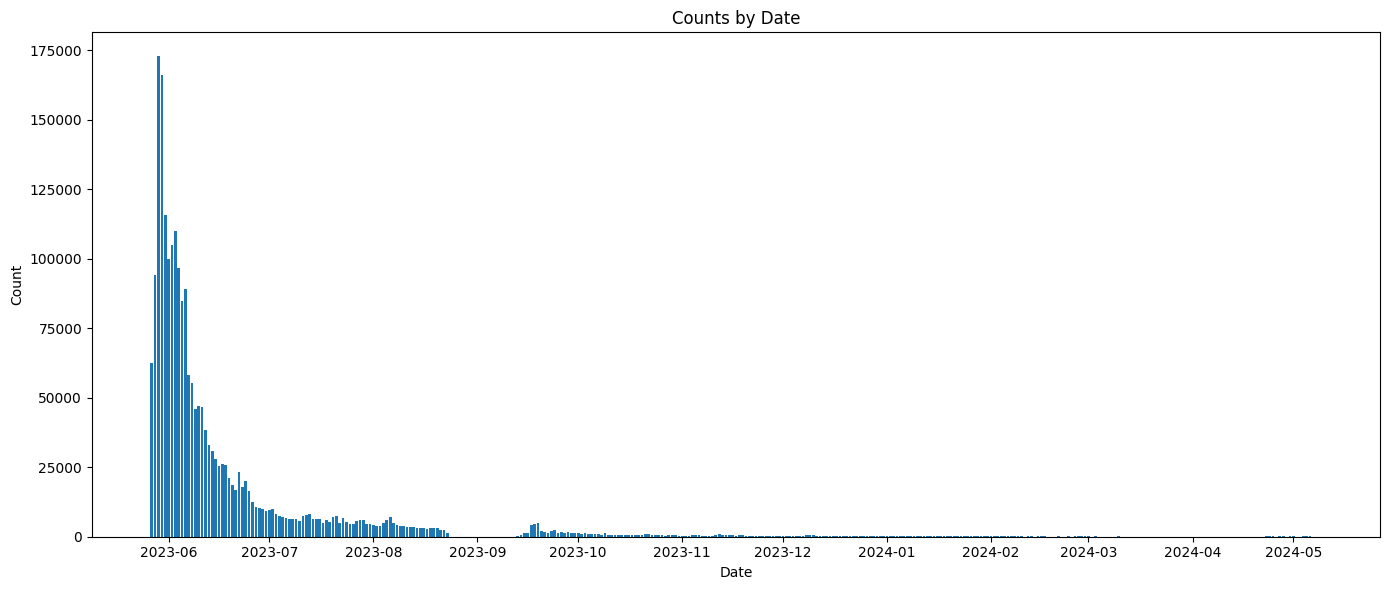

In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(14, 6))

plt.bar(df_counts['date'], df_counts['count'])

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())       # 월 단위 눈금
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Counts by Date')
plt.tight_layout()
plt.show()

In [6]:
# 리스트를 flatten 하기 이전, 2차원 구조를 유지하며 datetime 객체로 변환
lists_dates = [[parse(dt).date() for dt in sublist] for sublist in lists] 

# term: 날짜 간격 리스트
terms = [
    [(x[i+1] - x[i]).days for i in range(len(x)-1)] if len(x) >= 2 else []
    for x in lists_dates
]

# len: 리스트 길이
lengths = [len(x) for x in lists_dates]

# 결과 DataFrame 생성
new_df = pd.DataFrame({
    'term': terms,
    'len': lengths
})

display(new_df)

,term,len
0,"[1, 1, 1, 4, 3, 6, 3, 25, 21, 43, 2, 5]",13
1,"[2, 1, 3, 1, 2, 2, 1, 2, 1, 4, 1, 1, 1, 1, 1, ...",33
2,"[2, 1, 1, 1, 1, 4, 1, 7]",9
3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",30
4,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",31
...,...,...
349632,[],0
349633,[],1
349634,[],1
349635,[],1


In [7]:
new_df['avg_term'] = new_df['term'].apply(lambda x: sum(x) / len(x) if x else 0).round(2)

In [8]:
display(new_df)

,term,len,avg_term
0,"[1, 1, 1, 4, 3, 6, 3, 25, 21, 43, 2, 5]",13,9.58
1,"[2, 1, 3, 1, 2, 2, 1, 2, 1, 4, 1, 1, 1, 1, 1, ...",33,2.72
2,"[2, 1, 1, 1, 1, 4, 1, 7]",9,2.25
3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",30,1.17
4,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",31,1.07
...,...,...,...
349632,[],0,0.00
349633,[],1,0.00
349634,[],1,0.00
349635,[],1,0.00


In [170]:
new_df.describe()

,len,avg_term
count,349637.000000,349637.000000
mean,6.356098,5.417726
std,9.158459,15.245151
min,0.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,1.570000
75%,8.000000,3.800000
max,310.000000,345.000000


In [9]:
userwithdraw_df = ds.votes.accounts_userwithdraw()

In [14]:
userwithdraw_df.groupby('reason').size().sort_values(ascending=False).reset_index()

,reason,0
0,기타 이유,40301
1,함께 할 친구가 없어서,14450
2,재밌는 질문이 없어서,13133
3,버그가 너무 많아서,2031
4,구독료가 너무 비싸서,730
5,admin,61
6,test,53
7,기타,5


In [ ]:
userwithdraw_df['month'] = userwithdraw_df['created_at'].dt.to_period('M')
withdraw_counts = userwithdraw_df.groupby('month').size().reset_index(name='withdraw_count')
withdraw_counts

In [ ]:
user_df = ds.votes.accounts_user()
user_df.head(6)

In [23]:
temp_df = user_df[['id','created_at']].copy()
temp_df['month'] = temp_df['created_at'].dt.to_period('M')
temp_df = temp_df.groupby('month').size().reset_index(name='register_count')
temp_df

,month,register_count
0,2023-03,33
1,2023-04,19060
2,2023-05,635505
3,2023-06,16737
4,2023-07,1849
5,2023-08,524
6,2023-09,605
7,2023-10,409
8,2023-11,731
9,2023-12,231


In [54]:
merged_df = pd.merge(temp_df, withdraw_counts, on='month', how='outer', suffixes=('_user', '_withdraw'))
merged_df['ratio(withdraw/register)'] = round(merged_df['withdraw_count'] / merged_df['register_count'],2)
try:
    merged_df['month'] = merged_df['month'].dt.to_timestamp()  # Period를 Timestamp로 변환
except:
    pass
display(merged_df)

,month,register_count,withdraw_count,ratio(withdraw/register)
0,2023-03-01,33,17,0.52
1,2023-04-01,19060,2397,0.13
2,2023-05-01,635505,44845,0.07
3,2023-06-01,16737,9642,0.58
4,2023-07-01,1849,4811,2.60
5,2023-08-01,524,2310,4.41
6,2023-09-01,605,2450,4.05
7,2023-10-01,409,1164,2.85
8,2023-11-01,731,837,1.15
9,2023-12-01,231,693,3.00


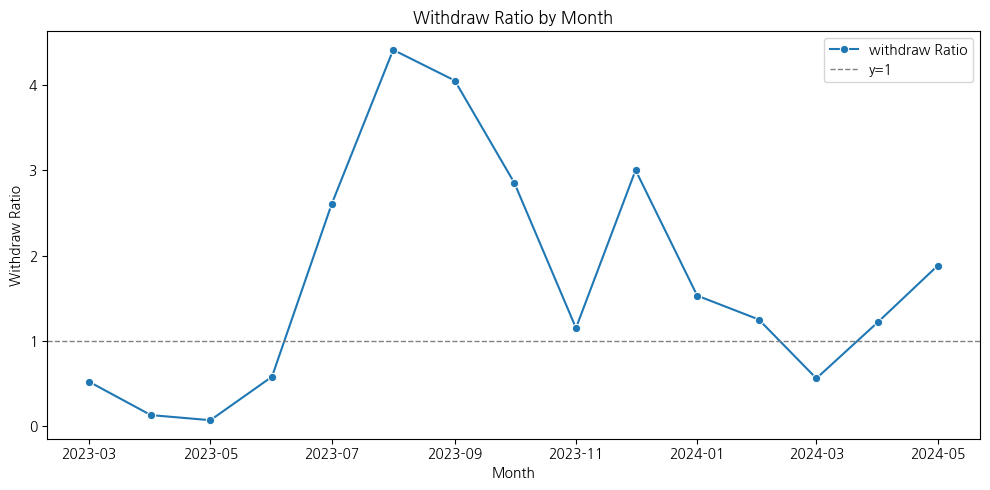

In [53]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=merged_df, x='month', y='ratio(withdraw/register)', marker='o', label='withdraw Ratio')

plt.xlabel('Month')
plt.ylabel('Withdraw Ratio')
plt.title('Withdraw Ratio by Month')
plt.axhline(y=1, color='gray', linestyle='--', linewidth=1, label='y=1')
plt.legend()
plt.tight_layout()
plt.show()
